In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import chi2
from scipy.special import psi
from math import log

from scipy.stats import gamma
from scipy.stats import lognorm
from fitter import Fitter

In [20]:
data_ff = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/florestal/20m/FF_20170112_20m_patches.csv')
data_fs = pd.read_csv('D:/thesis_data/VEG_INDICES/samples/stratified/savanica/20m/FS_20170112_20m_patches.csv')

In [22]:
len(data_ff.index)

400

In [23]:
dprvi_patches = data_ff.filter(regex='^dprvi_patch', axis=1)
prvi_patches = data_ff.filter(regex='^prvi_patch', axis=1)
dpsvi_patches = data_ff.filter(regex='^dpsvi_patch', axis=1)
dpsvim_patches = data_ff.filter(regex='^dpsvim_patch', axis=1)
rvi_patches = data_ff.filter(regex='^rvi_patch', axis=1)

In [17]:
for column in dprvi_patches.columns:
    data = dprvi_patches[column]
    [shape,_, scale] = gamma.fit(data)
    print(shape, scale)

16965.93826297461 0.0008636142191046519
563.682308680796 0.00454204539485575
445.4884006843422 0.005905609112153123
44.627056550816434 0.022710747249336895
19.618511110969155 0.023818852439832176
901.7839742833357 0.004891224395929809
7.056791473558934 0.060449240727272716
8.337282855467759 0.044016683326323094
803.8313692670145 0.004479705101992321
793.3506987325054 0.004446598358451645
778.7609835190767 0.006562604216656005
7615.935157879487 0.0014086709690222209
5191.78804945013 0.0015653065537209977
335.7401244704822 0.005634952140960093
9603.39544861072 0.0012245276925418663
15.330081517872884 0.02901224046662808
330.80962793907565 0.00648574349996605
8.168077528892493 0.04369316553483167
79.72795004569981 0.01132966550189242
661.3761172228428 0.004222033218872608
14.378592963023163 0.02379823782004413
184.7883467873761 0.00788421342204294
19.240526142585207 0.02781682657213065
5210047.69690747 7.105524770485629e-05
365.77460307116553 0.006869065644325921
10.756876928727383 0.0469

In [491]:
data_p = data_ff['dpsvim_patch_0']
data_q = data_fs['dpsvim_patch_0']

In [492]:
[a_p, loc_p, scale_p] = gamma.fit(data_p)
[a_q, loc_q, scale_q] = gamma.fit(data_q)

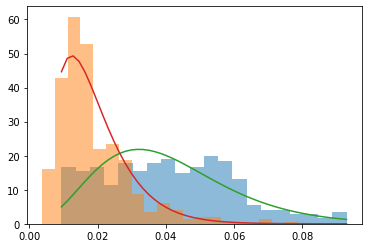

In [493]:
x = np.linspace(np.min(data_p), np.max(data_p))

plt.hist(data_p, bins=20, density=True, alpha=0.5)
plt.hist(data_q, bins=20, density=True, alpha=0.5)

plt.plot(x, gamma.pdf(x, a_p, loc_p, scale_p))
plt.plot(x, gamma.pdf(x, a_q, loc_q, scale_q))

In [494]:
kp = a_p
kq = a_q
thetap = scale_p
thetaq = scale_q

dskl_ln = ((mup - muq)^2)/(2 * (sigma_p^2) * (sigma_q^2))

dskl_g = ((kp - kq) * (psi(kp) + log(thetap) - psi(kq) - log(thetaq)) + ((kp*thetap - kq*thetaq) * ((thetap - thetaq) / (thetap * thetaq)))) / 2

m = data_p.count()
n = data_q.count()
v = 1

s = ((2*m*n*v) / (m + n)) * dskl_kn
 
p_value = chi2.sf(s, df=2)

if p_value <= 0.05:
    print('Reject H0')

Reject H0


In [495]:
(2*m*n*v) / (m + n)

400.0

In [496]:
dskl

2.196557929176438

In [497]:
p_value

1.619580113700372e-191

In [498]:
s

878.6231716705752